<a href="https://colab.research.google.com/github/Atharva-D/MOT/blob/main/prophet_india_data_projectMOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
# from google.colab import files
# files.upload()

In [110]:
!pip install prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet

In [111]:
data = pd.read_csv("city_day.csv")
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [112]:
data1 = data.loc[data['City'] == "Delhi"]
data1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [113]:
col_names = []
for column in data1:
  col_names.append(column)

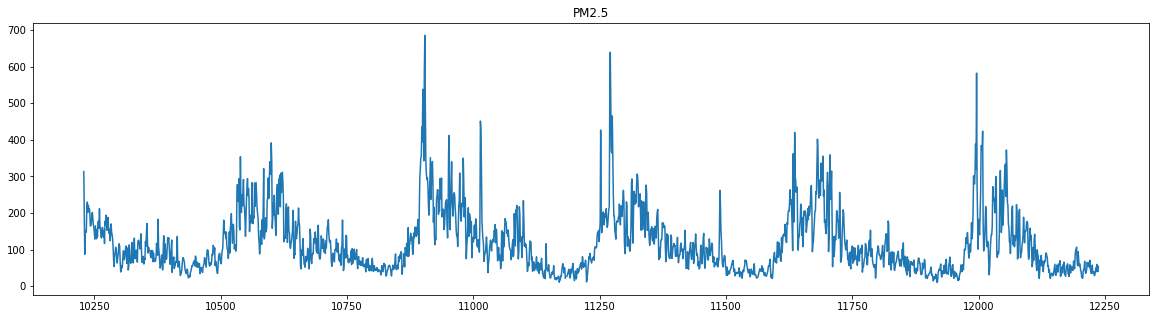

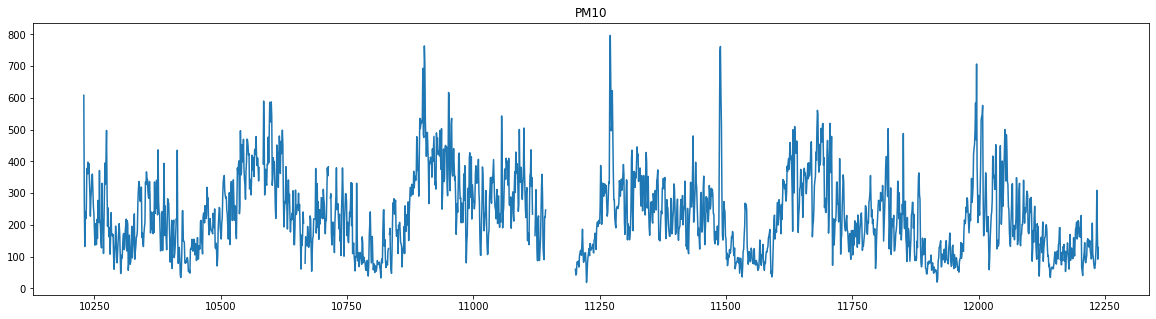

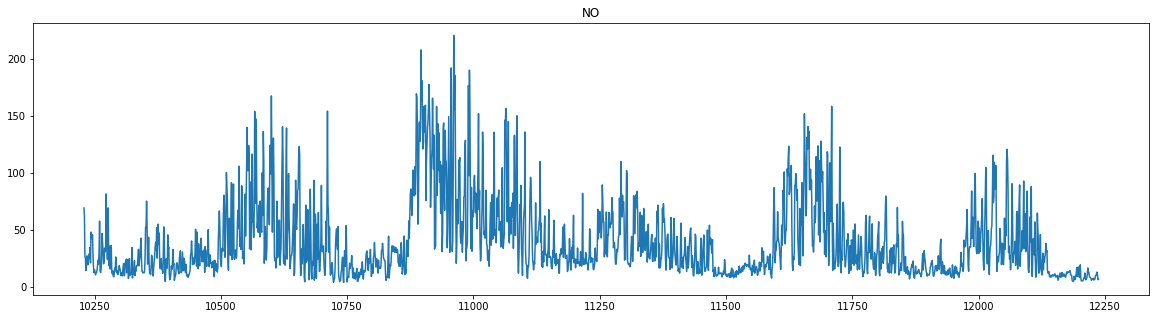

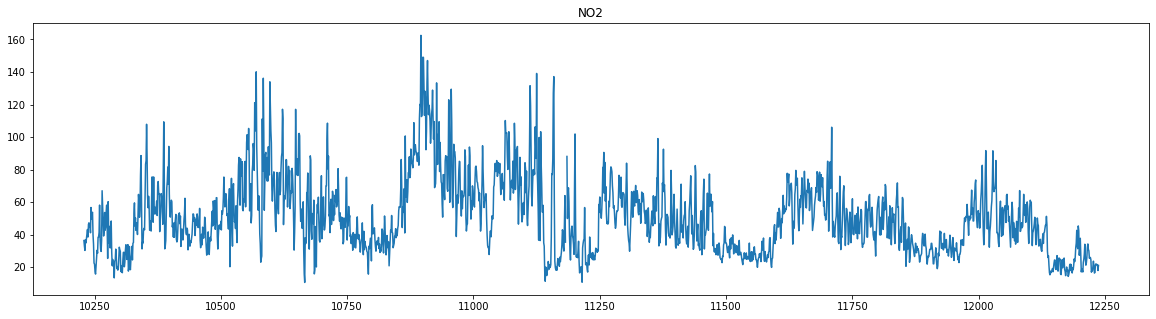

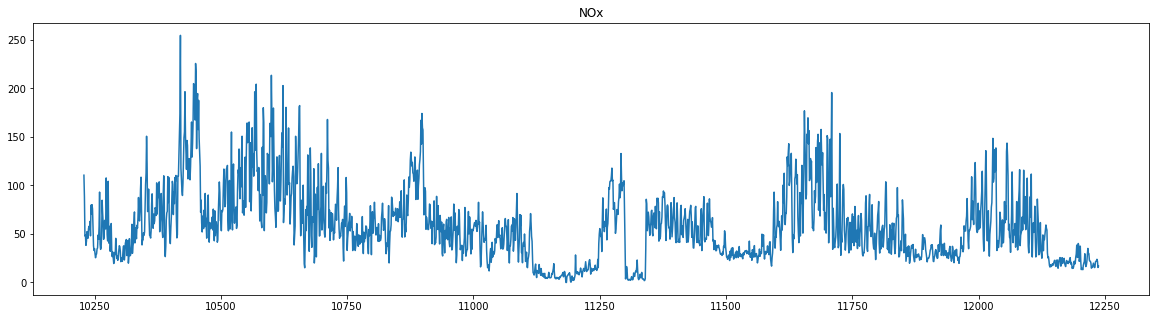

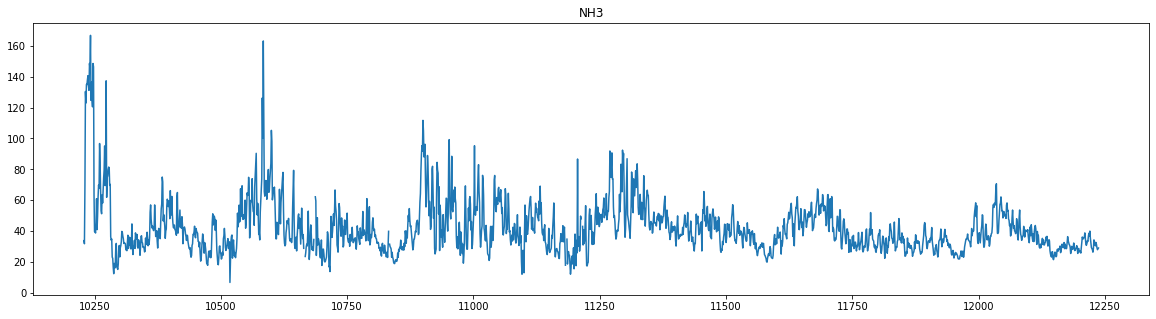

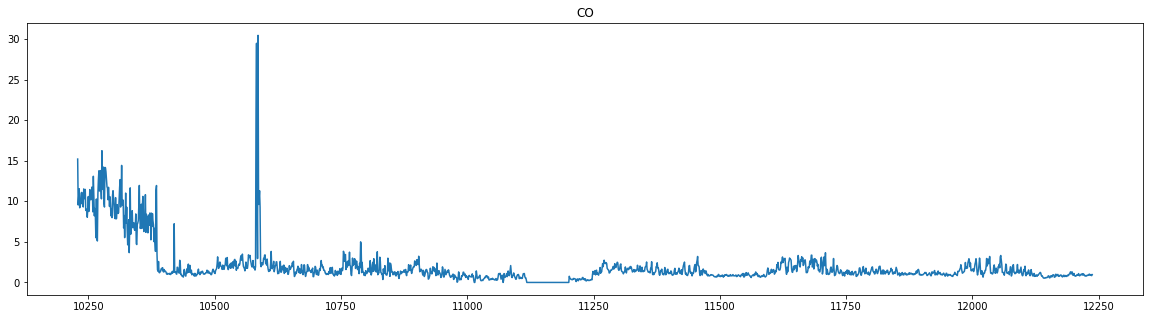

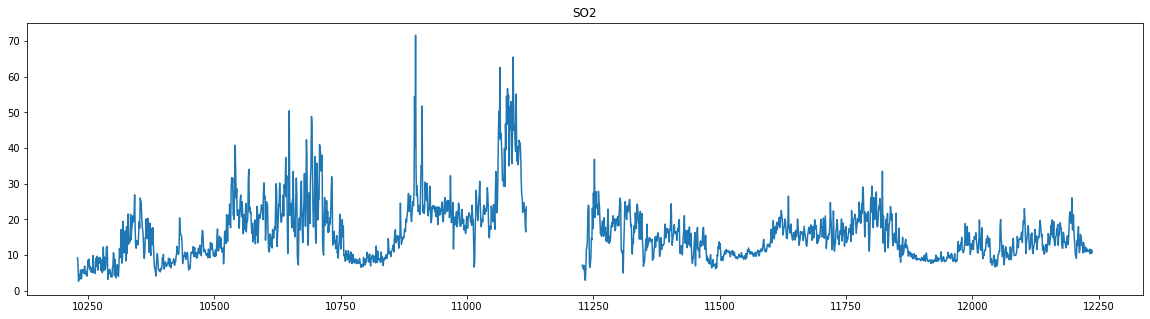

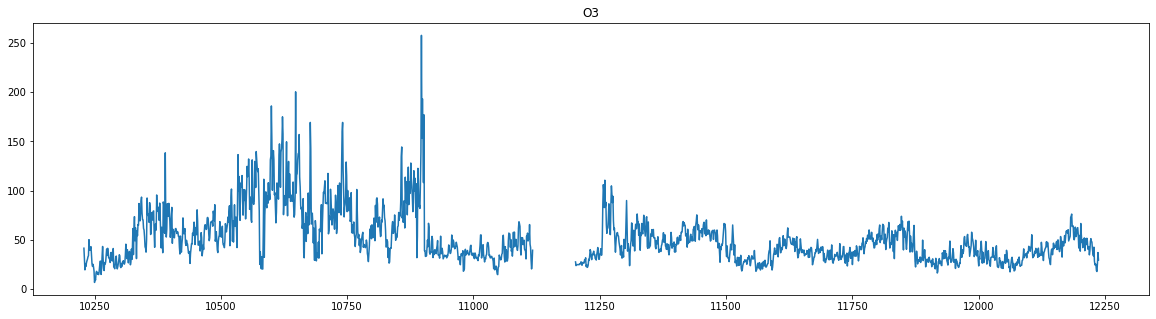

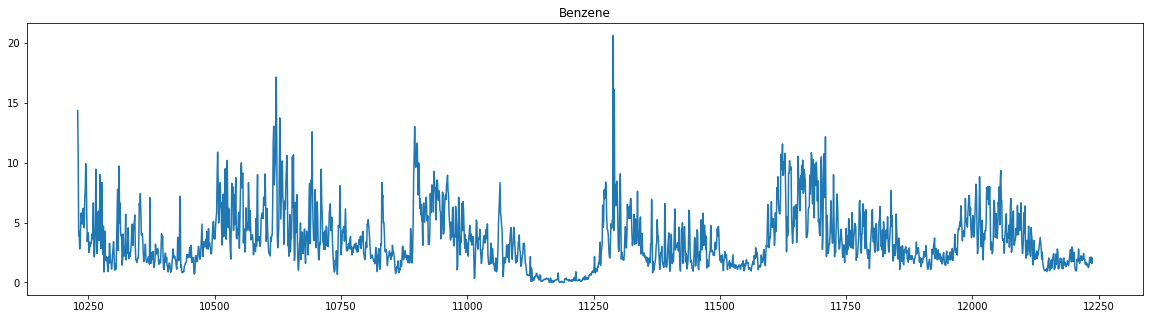

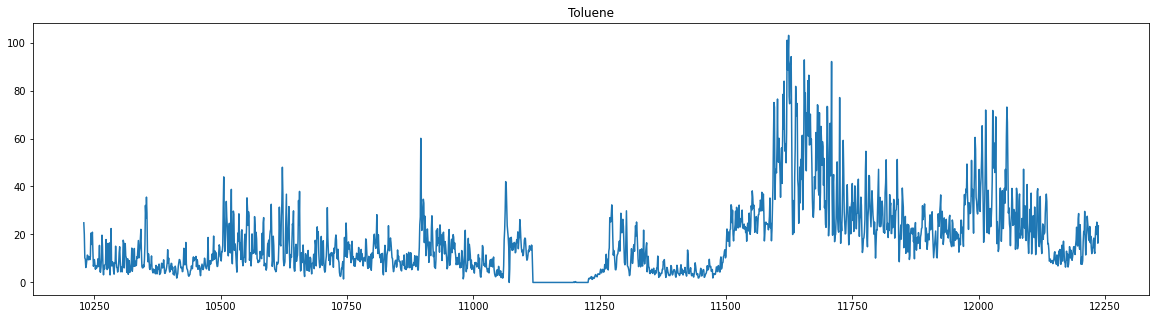

In [114]:
for i in range(3,14):
  plt.figure(figsize=(20,5))
  plt.plot(data1.iloc[:,i-1:i])
  plt.title(col_names[i-1])
  plt.show()

# **FaceBook Prophet**

In [115]:
from sklearn.model_selection import train_test_split
ds, x_test, y, y_test = train_test_split(data1["Date"], data1["PM2.5"], test_size=10, random_state=0)

In [116]:
ds = np.array(ds)
y = np.array(y)

In [117]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [118]:
df = pd.DataFrame(ds)
df.columns = ["ds"]
df['y'] = y
df.head()

,ds,y
0,2017-08-24,47.79
1,2017-04-08,151.25
2,2015-08-04,54.46
3,2019-04-09,87.74
4,2016-06-06,84.61


In [119]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [120]:
future = model.make_future_dataframe(periods=10)
future.tail()

,ds
2004,2020-07-07
2005,2020-07-08
2006,2020-07-09
2007,2020-07-10
2008,2020-07-11


In [121]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2004,2020-07-07,13.481623,-50.543650,76.562024
2005,2020-07-08,14.549105,-48.206987,74.267759
2006,2020-07-09,16.266113,-44.261818,75.755147
2007,2020-07-10,14.023165,-47.447060,75.391572
2008,2020-07-11,11.678305,-56.458973,73.250683


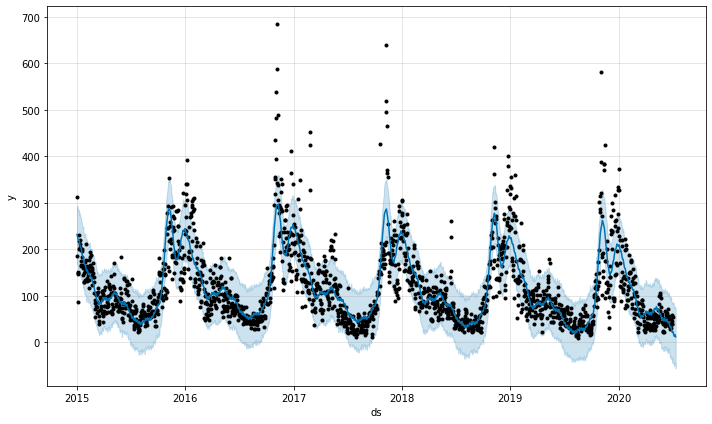

In [122]:
fig1 = model.plot(forecast)

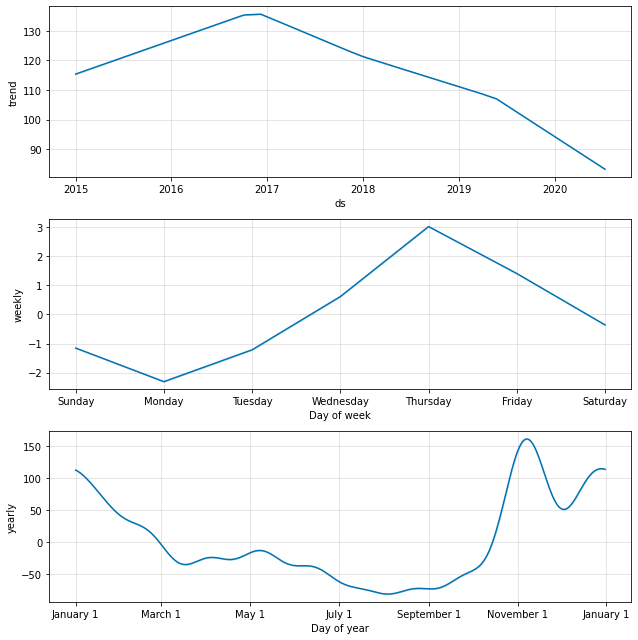

In [123]:
fig2 = model.plot_components(forecast)

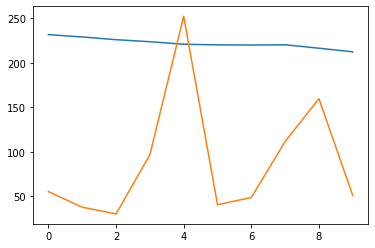

In [124]:
# original data vs predicted data
plt.plot(forecast["yhat"][:10])
plt.plot(y_test)

In [125]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,115.392101,168.507225,289.844064,115.392101,115.392101,116.422017,116.422017,116.422017,3.021751,3.021751,3.021751,113.400266,113.400266,113.400266,0.0,0.0,0.0,231.814118
1,2015-01-02,115.423366,170.116095,294.103131,115.423366,115.423366,113.726181,113.726181,113.726181,1.407053,1.407053,1.407053,112.319128,112.319128,112.319128,0.0,0.0,0.0,229.149546
2,2015-01-03,115.454631,165.931716,291.975625,115.454631,115.454631,110.648883,110.648883,110.648883,-0.359645,-0.359645,-0.359645,111.008528,111.008528,111.008528,0.0,0.0,0.0,226.103514
3,2015-01-04,115.485896,161.307039,285.798934,115.485896,115.485896,108.333805,108.333805,108.333805,-1.156138,-1.156138,-1.156138,109.489943,109.489943,109.489943,0.0,0.0,0.0,223.819700
4,2015-01-05,115.517161,157.547138,283.133743,115.517161,115.517161,105.472994,105.472994,105.472994,-2.311258,-2.311258,-2.311258,107.784252,107.784252,107.784252,0.0,0.0,0.0,220.990154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,2020-07-07,83.394633,-50.543650,76.562024,83.394633,83.394633,-69.913010,-69.913010,-69.913010,-1.216238,-1.216238,-1.216238,-68.696772,-68.696772,-68.696772,0.0,0.0,0.0,13.481623
2005,2020-07-08,83.337022,-48.206987,74.267759,83.337022,83.337022,-68.787917,-68.787917,-68.787917,0.614475,0.614475,0.614475,-69.402392,-69.402392,-69.402392,0.0,0.0,0.0,14.549105
2006,2020-07-09,83.279410,-44.261818,75.755147,83.279410,83.279410,-67.013298,-67.013298,-67.013298,3.021751,3.021751,3.021751,-70.035049,-70.035049,-70.035049,0.0,0.0,0.0,16.266113
2007,2020-07-10,83.221799,-47.447060,75.391572,83.221799,83.221799,-69.198635,-69.198635,-69.198635,1.407053,1.407053,1.407053,-70.605687,-70.605687,-70.605687,0.0,0.0,0.0,14.023165
